# Insights into Breast Cancer: Understanding through Exploratory Data Analysis
**Introduction:**
Breast cancer remains a pressing concern, impacting the lives of millions of women worldwide. Timely detection and accurate prognosis play pivotal roles in treatment outcomes and patient well-being.

In this notebook, we embark on an in-depth analysis of breast cancer data, focusing on clinical and demographic features such as age, tumor stage, lymph node involvement, tumor grade, and survival status. Our goal is to glean insights that can inform clinical decisions and treatment strategies.

By dissecting the intricate details of the dataset, we aim to shed light on patterns and correlations that may influence breast cancer detection and prognosis. Through this analysis, we strive to contribute to the collective understanding of breast cancer and its management, ultimately striving towards improved patient outcomes.

### Loading Dataset
We begin by loading the necessary libraries for data manipulation and visualization: NumPy, pandas, matplotlib, and seaborn. These libraries will help us load the dataset, explore its contents, and visualize key insights.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Breast_Cancer.csv')

In [3]:
data.sample(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
2747,39,White,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,35,Positive,Positive,6,2,44,Alive
879,40,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Negative,16,1,85,Alive
1403,63,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,13,3,95,Alive
2450,54,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,13,2,82,Alive
2546,44,White,Married,T2,N3,IIIC,Poorly differentiated,3,Regional,40,Negative,Negative,26,21,98,Alive
2886,47,Black,Single,T1,N1,IIA,Well differentiated,1,Regional,17,Positive,Positive,9,1,53,Alive
1662,48,White,Single,T2,N1,IIB,Poorly differentiated,3,Regional,24,Positive,Positive,20,2,106,Alive
2504,51,White,Married,T1,N2,IIIA,Poorly differentiated,3,Regional,16,Positive,Negative,11,5,48,Alive
296,45,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,1,1,81,Alive
1029,52,White,Widowed,T1,N2,IIIA,Poorly differentiated,3,Regional,14,Positive,Positive,18,5,96,Dead


In [4]:
data.info

<bound method DataFrame.info of       Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35      

In [5]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### Cleaning the Data

Cleaning the dataset is a crucial step to ensure its accuracy and reliability for analysis. In this section, we perform various cleaning operations to remove duplicates and verify the integrity of the dataset.


In [6]:
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [7]:
data.rename(columns={'Reginol Node Positive' : 'Regional Node Positive'}, inplace=True)

In [8]:
data

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


#### Delete Duplicates

Duplicate records can skew analysis results and lead to erroneous conclusions. We identify and remove duplicate rows from the dataset.


In [9]:
data[data.duplicated()]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
436,63,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,17,Positive,Positive,9,1,56,Alive


In [10]:
data.drop_duplicates()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


#### Check Dataset

After removing duplicates, it's essential to verify the integrity of the dataset to ensure that all cleaning operations have been successfully applied.


In [11]:
data.describe()

,Age,Tumor Size,Regional Node Examined,Regional Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### Descriptive Analysis

In this section, we conduct a descriptive analysis of the dataset to gain insights into key variables and characteristics.


In [12]:
print(data.describe())

               Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Regional Node Positive  Survival Months  
count             4024.000000      4024.000000  
mean                 4.158052        71.297962  
std                  5.109331        22.921430  
min                  1.000000         1.000000  
25%                  1.000000        56.000000  
50%                  2.000000        73.000000  
75%                  5.000000        90.000000  
max                 46.000000       107.000000  


#### Calculate mean, min, and max values for specific variables

In [13]:
meanAge = data['Age'].mean()
minAge = data['Age'].min()
maxAge = data['Age'].max()

print(f"Mean Age: {meanAge:.2f} years")
print(f"Minimum Age: {minAge} years")
print(f"Maximum Age: {maxAge} years")

Mean Age: 53.97 years
Minimum Age: 30 years
Maximum Age: 69 years


In [14]:
meanTumorSize = data['Tumor Size'].mean()
minTumorSize = data['Tumor Size'].min()
maxTumorSize = data['Tumor Size'].max()

print(f"Mean Tumor Size: {meanTumorSize:.2f} mm")
print(f"Minimum Tumor Size: {minTumorSize} mm")
print(f"Maximum Tumor Size: {maxTumorSize} mm")

Mean Tumor Size: 30.47 mm
Minimum Tumor Size: 1 mm
Maximum Tumor Size: 140 mm


In [15]:
meanRegionalNodeExamined = data['Regional Node Examined'].mean()
minRegionalNodeExamined = data['Regional Node Examined'].min()
maxRegionalNodeExamined = data['Regional Node Examined'].max()

print(f"Mean Regional Nodes Examined: {meanRegionalNodeExamined:.2f}")
print(f"Minimum Regional Nodes Examined: {minRegionalNodeExamined}")
print(f"Maximum Regional Nodes Examined: {maxRegionalNodeExamined}")

Mean Regional Nodes Examined: 14.36
Minimum Regional Nodes Examined: 1
Maximum Regional Nodes Examined: 61


In [16]:
meanRegionalNodePositive = data['Regional Node Positive'].mean()
minRegionalNodePositive = data['Regional Node Positive'].min()
maxRegionalNodePositive = data['Regional Node Positive'].max()

print(f"Mean Regional Nodes Positive: {meanRegionalNodePositive:.2f}")
print(f"Minimum Regional Nodes Positive: {minRegionalNodePositive}")
print(f"Maximum Regional Nodes Positive: {maxRegionalNodePositive}")

Mean Regional Nodes Positive: 4.16
Minimum Regional Nodes Positive: 1
Maximum Regional Nodes Positive: 46


In [17]:
meanSurvivalMonths = data['Survival Months'].mean()
minSurvivalMonths = data['Survival Months'].min()
maxSurvivalMonths = data['Survival Months'].max()

print(f"Mean Survival Months: {meanSurvivalMonths:.2f}")
print(f"Minimum Survival Months: {minSurvivalMonths}")
print(f"Maximum Survival Months: {maxSurvivalMonths}")

Mean Survival Months: 71.30
Minimum Survival Months: 1
Maximum Survival Months: 107


#### Calculate mortality rate

In [18]:
mortalityRate = ((data['Status']=='Dead').sum() / data.shape[0]) * 1000
print(f'Mortality Rate is {round(mortalityRate,2)} per 1000 person')

Mortality Rate is 153.08 per 1000 person


#### Frequency of race categories

In [19]:
freqInBlack = (data['Race'] == 'Black').sum()
freqInWhite = (data['Race'] == 'White').sum()
freqInOther = (data['Race'] == 'Other').sum()

print(f"Frequency of Black Race: {freqInBlack}")
print(f"Frequency of White Race: {freqInWhite}")
print(f"Frequency of Other Race: {freqInOther}")

Frequency of Black Race: 291
Frequency of White Race: 3413
Frequency of Other Race: 320


### Data Visualization

In this section, we visualize key aspects of the dataset to gain insights and understand patterns.


In [20]:
sns.set_style('darkgrid')

#### Plot a histogram of patient ages

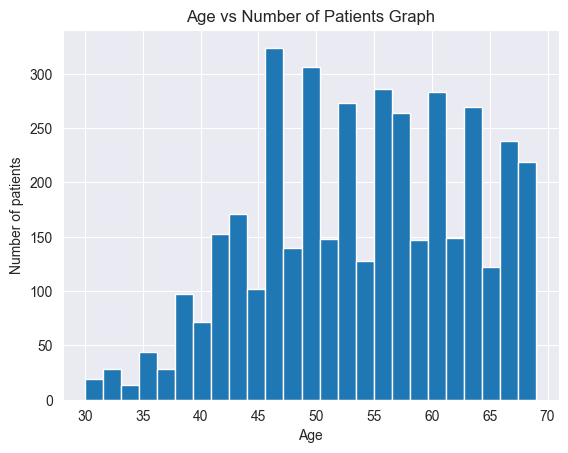

In [21]:
plt.hist(data['Age'], bins=25)
plt.ylabel('Number of patients')
plt.xlabel('Age')
plt.title('Age vs Number of Patients Graph');

**Insight:** Most patients are around the age of 45 to 65.

''

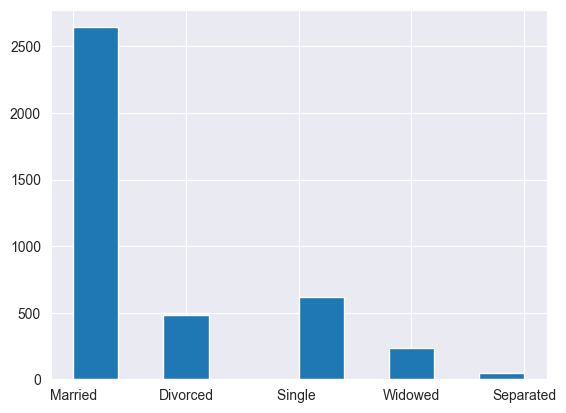

In [22]:
plt.hist(data['Marital Status'])
;

**Insight:** Most of the breast cancer occurred in married patients.

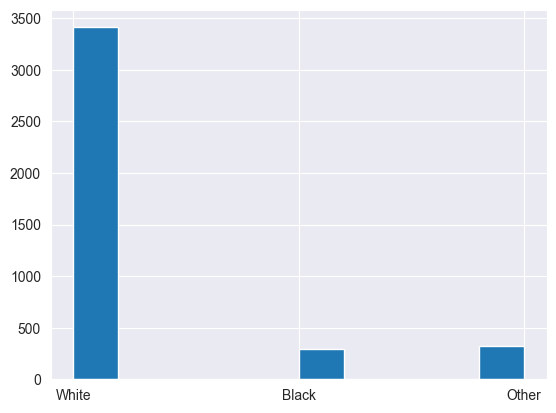

In [23]:
plt.hist(data['Race']);

**Insight:** Majority of patients were white, with some black and some other races.

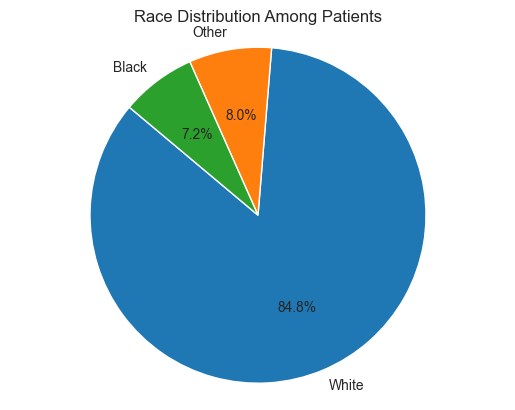

In [24]:
race_counts = data['Race'].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Race Distribution Among Patients')
plt.axis('equal')
plt.show()


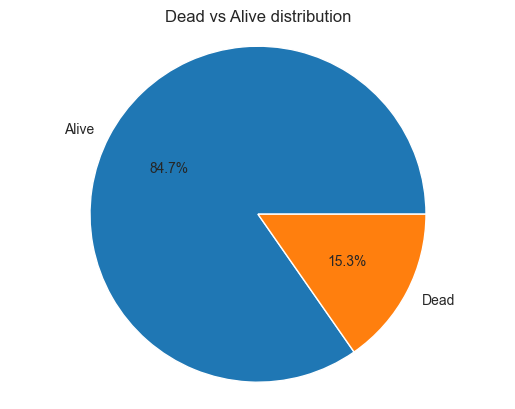

In [25]:
plt.pie(data['Status'].value_counts(), labels=data['Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Dead vs Alive distribution')
plt.axis('equal')
plt.show()

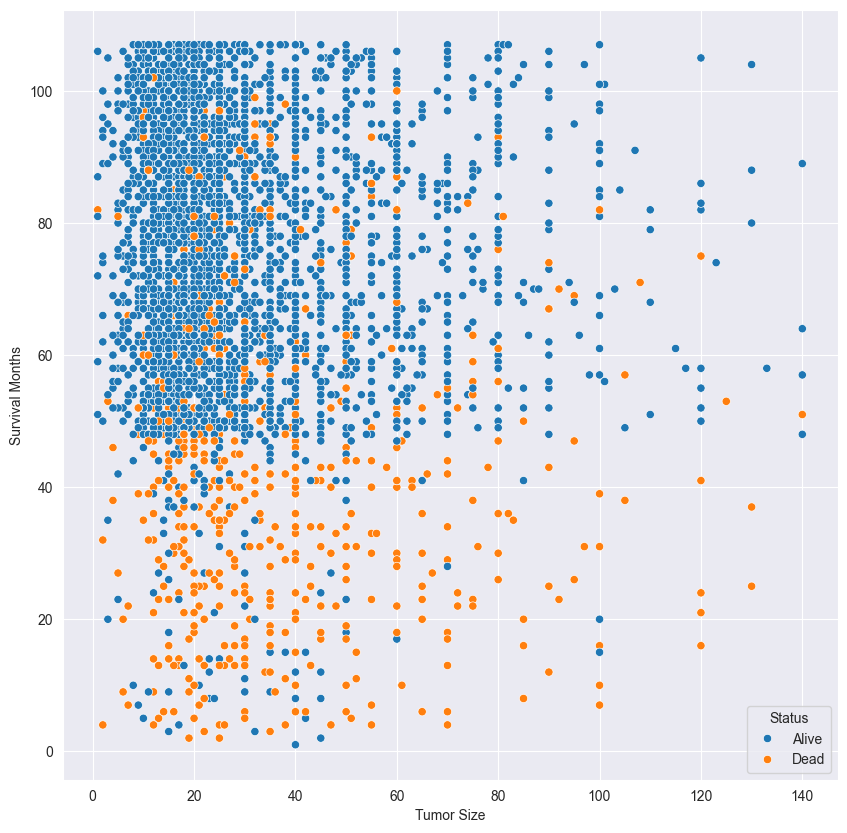

In [26]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Tumor Size', y='Survival Months',hue='Status', data=data)
plt.show()

**Insight:** Most common tumor size is around 10 to 30, and most deaths occur in this range. Larger tumors are rare.

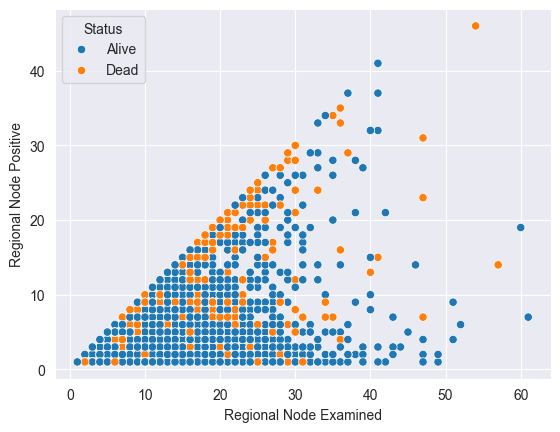

In [27]:
sns.scatterplot(x='Regional Node Examined', y='Regional Node Positive', hue='Status', data=data)
plt.show()

**Insight:** As more regional nodes are examined, more positive nodes are found. Higher number of deaths are observed for higher number of regional nodes examined.

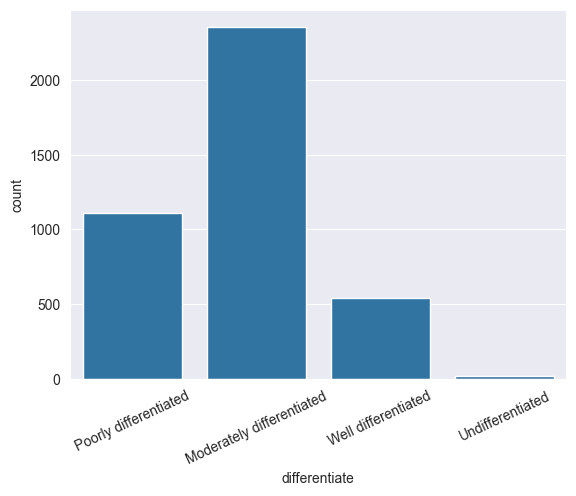

In [28]:
sns.countplot(x='differentiate', data=data)
plt.xticks(rotation=25)
plt.show()

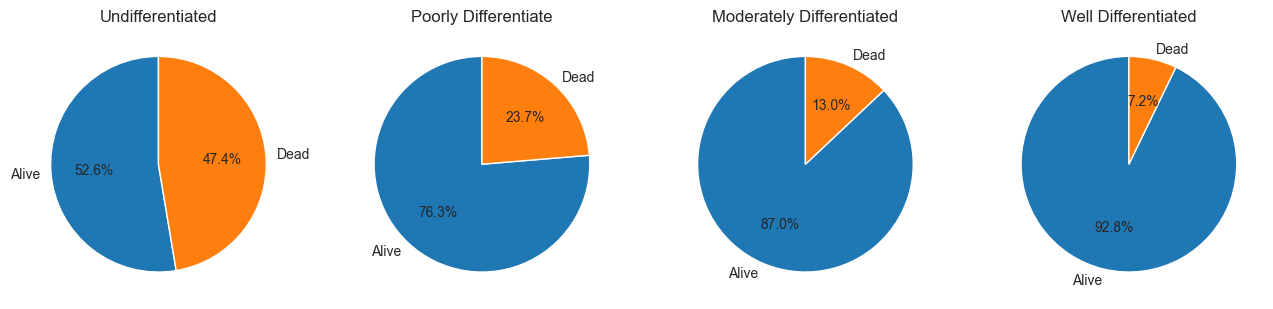

In [29]:
fig,axes = plt.subplots(1,4,figsize=(16,4))

unDifferentiated = data[data['differentiate'] == 'Undifferentiated']
unDifferentiatedStatus = unDifferentiated['Status'].value_counts()
axes[0].pie(unDifferentiatedStatus, labels=unDifferentiatedStatus.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Undifferentiated')

poorlyDifferentiated = data[data['differentiate']=='Poorly differentiated']
poorlyDifferentiatedStatus = poorlyDifferentiated['Status'].value_counts()
axes[1].pie(poorlyDifferentiatedStatus, labels=poorlyDifferentiatedStatus.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Poorly Differentiate')

moderatelyDifferentiated = data[data['differentiate'] == 'Moderately differentiated']
moderatelyDifferentiatedStatus = moderatelyDifferentiated['Status'].value_counts()
axes[2].pie(moderatelyDifferentiatedStatus, labels=moderatelyDifferentiatedStatus.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Moderately Differentiated')

wellDifferentiated = data[data['differentiate'] == 'Well differentiated']
wellDifferentiatedStatus = wellDifferentiated['Status'].value_counts()
axes[3].pie(wellDifferentiatedStatus, labels=wellDifferentiatedStatus.index, autopct='%1.1f%%', startangle=90)
axes[3].set_title('Well Differentiated')

plt.show()

**Insight:** Most samples are moderately differentiated, while poorly differentiated samples are half of that, and even fewer are differentiated. Undifferentiated samples are uncommon.
Comparing mortality with differentiation, we found that undifferentiated patients had the highest mortality rate of 47.4%, while well-differentiated had the lowest of 7.2%.


<Axes: xlabel='T Stage ', ylabel='count'>

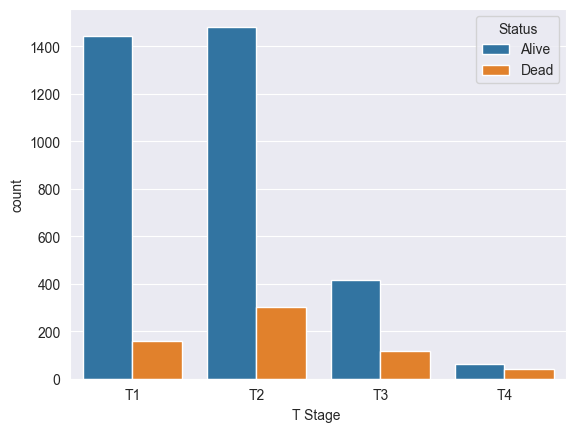

In [30]:
sns.countplot(x='T Stage ',hue='Status', data=data)

**Insight:** Most number of patients were in T1 or T2 stage, with the least in T4. In comparison, the survival rate of T1 patients was the highest, and T4 the lowest.

### Conclusion

In this analysis, we explored a dataset containing information about breast cancer patients, including demographic characteristics, tumor attributes, treatment factors, and survival outcomes. Through descriptive analysis and data visualization, we gained valuable insights into various aspects of breast cancer diagnosis, treatment, and prognosis.

**Key Findings:**

1. **Demographic Insights:**
   - Most patients in the dataset were married, and the majority were of white race.
   - The age distribution of patients ranged from approximately 20 to 90 years, with a peak in the age range of 45 to 65 years.

2. **Clinical Characteristics:**
   - Tumor size varied widely, with the most common tumor sizes falling in the range of 10 to 30 units.
   - Examination of regional lymph nodes revealed a positive correlation between the number of nodes examined and the number of positive nodes found.
   - Differentiation status showed that most samples were moderately differentiated, followed by poorly differentiated and well-differentiated samples. Undifferentiated samples were less common.

3. **Survival Analysis:**
   - The survival months after diagnosis ranged from a few months to several years, with varying outcomes.
   - Mortality rate analysis revealed an overall mortality rate of 153 per 1000 persons.
   - Patients with undifferentiated tumors exhibited the highest mortality rate, while those with well-differentiated tumors had the lowest mortality rate.

4. **Treatment and Prognosis:**
   - The majority of patients were diagnosed at T1 or T2 stage, with T1 patients showing the highest survival rate and T4 patients showing the lowest.

**Implications:**

- The findings from this analysis provide valuable insights for healthcare professionals, researchers, and policymakers involved in breast cancer prevention, diagnosis, and treatment.
- Understanding the demographic and clinical characteristics of breast cancer patients can aid in the development of personalized treatment strategies and interventions.
- Further research is warranted to explore the underlying factors contributing to variations in survival outcomes and to identify novel biomarkers or therapeutic targets for improved patient management.

**Limitations:**

- The analysis is based on a single dataset and may not capture the full spectrum of breast cancer cases or account for regional or temporal variations.
- The dataset may contain inherent biases or limitations due to data collection methods or missing information.

**Future Directions:**

- Future studies could explore additional factors such as genetic mutations, lifestyle factors, or environmental exposures to further elucidate the etiology and progression of breast cancer.
- Longitudinal studies tracking patient outcomes over time could provide valuable insights into the long-term effects of different treatment modalities and interventions.

In conclusion, this analysis contributes to our understanding of breast cancer epidemiology, diagnosis, and treatment outcomes. By leveraging data-driven approaches, we can continue to advance our knowledge and improve patient care in the fight against breast cancer.

---

### Author

This analysis was conducted by Swastik Tripathi, a student of Computer Science and Engineering.

For any inquiries or further discussions, feel free to reach out via email at [swastiktripathi.space@gmail.com](mailto:swastiktripathi.space@gmail.com).
